In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots inside the notebook
%matplotlib inline


In [ ]:
# Load the dataset
df = pd.read_csv("Zomato data .csv")

# See first 5 rows
df.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [ ]:
df.info()
df.describe(include="all")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
count,148,148,148,148,148.000000,148.000000,148
unique,145,2,2,20,NaN,NaN,4
top,San Churro Cafe,No,No,3.8/5,NaN,NaN,Dining
freq,2,90,140,19,NaN,NaN,110
mean,NaN,NaN,NaN,NaN,264.810811,418.243243,NaN
std,NaN,NaN,NaN,NaN,653.676951,223.085098,NaN
min,NaN,NaN,NaN,NaN,0.000000,100.000000,NaN
25%,NaN,NaN,NaN,NaN,6.750000,200.000000,NaN
50%,NaN,NaN,NaN,NaN,43.500000,400.000000,NaN
75%,NaN,NaN,NaN,NaN,221.750000,600.000000,NaN


**Step 3: Clean and Prepare the Data**

In [ ]:
# See unique values in rate
df['rate'].unique()[:20]


array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5'],
      dtype=object)

In [ ]:
# Remove spaces
df['rate'] = df['rate'].astype(str).str.strip()

# Replace 'NEW' and '-' with NaN
df['rate'] = df['rate'].replace(['NEW', '-'], np.nan)

# Keep only the part before '/5' and convert to float
df['rate'] = df['rate'].str.split('/').str[0]
df['rate'] = df['rate'].astype(float)

# Check result
df['rate'].describe()


,rate
count,148.000000
mean,3.633108
std,0.402271
min,2.600000
25%,3.300000
50%,3.700000
75%,3.900000
max,4.600000


In [ ]:
df['approx_cost(for two people)'] = (
    df['approx_cost(for two people)']
    .astype(str)
    .str.replace(',', '', regex=False)
    .replace('nan', np.nan)
    .astype(float)
)

df['approx_cost(for two people)'].describe()


,approx_cost(for two people)
count,148.000000
mean,418.243243
std,223.085098
min,100.000000
25%,200.000000
50%,400.000000
75%,600.000000
max,950.000000


In [ ]:
df.info()

# Count nulls per column
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    float64
 6   listed_in(type)              148 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 8.2+ KB


,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


In [ ]:
df_clean = df.dropna(subset=['rate'])
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    float64
 6   listed_in(type)              148 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 8.2+ KB


**Step 4: Data Analysis and Visualization**

In [ ]:
sns.set(style="whitegrid")


**Analysis 1: Types of Restaurants**

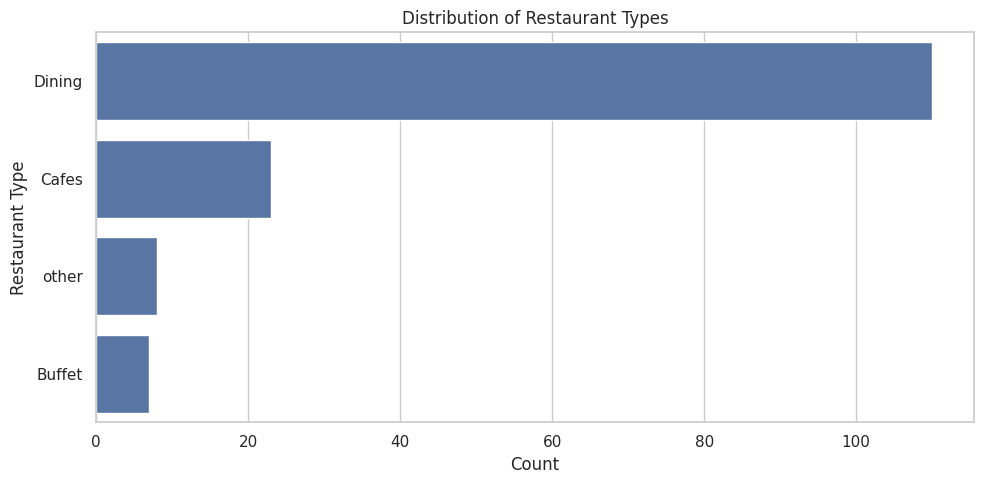

,count
listed_in(type),
Dining,110
Cafes,23
other,8
Buffet,7


In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(
    y='listed_in(type)',
    data=df_clean,
    order=df_clean['listed_in(type)'].value_counts().index
)
plt.title("Distribution of Restaurant Types")
plt.xlabel("Count")
plt.ylabel("Restaurant Type")
plt.tight_layout()
plt.show()

# See counts numerically
df_clean['listed_in(type)'].value_counts()


**Analysis 2: Votes by restaurant type**

listed_in(type)
Dining    20363
other      9367
Cafes      6434
Buffet     3028
Name: votes, dtype: int64


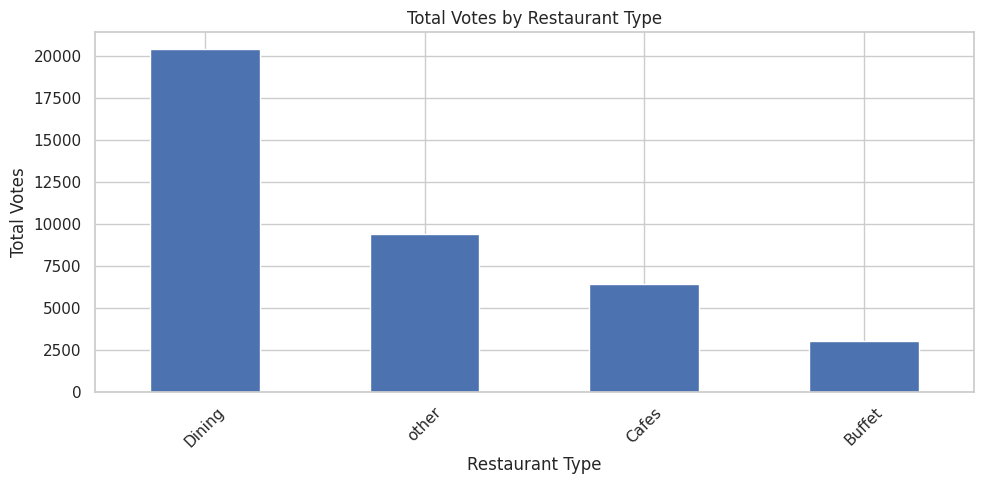

In [ ]:
votes_by_type = (
    df_clean
    .groupby('listed_in(type)')['votes']
    .sum()
    .sort_values(ascending=False)
)

print(votes_by_type)

plt.figure(figsize=(10, 5))
votes_by_type.plot(kind='bar')
plt.title("Total Votes by Restaurant Type")
plt.ylabel("Total Votes")
plt.xlabel("Restaurant Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Analysis 3: Ratings distribution**

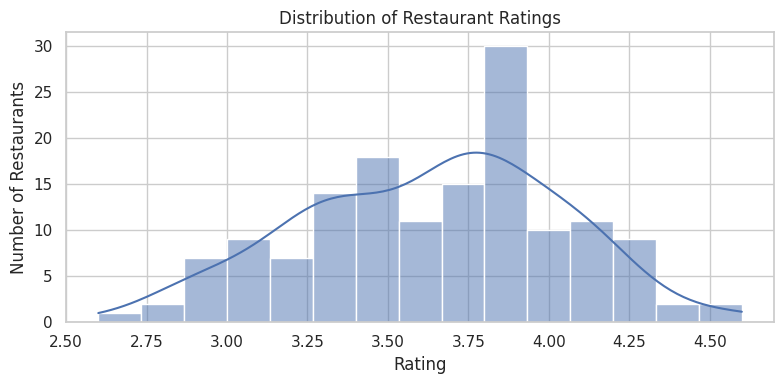

,rate
count,148.000000
mean,3.633108
std,0.402271
min,2.600000
25%,3.300000
50%,3.700000
75%,3.900000
max,4.600000


In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(df_clean['rate'], bins=15, kde=True)
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Restaurants")
plt.tight_layout()
plt.show()

# Look at some statistics
df_clean['rate'].describe()


In [ ]:
# Count ratings in ranges
bins = [0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
labels = ["<2.5", "2.5–3.0", "3.0–3.5", "3.5–4.0", "4.0–4.5", "4.5–5.0"]

df_clean['rating_range'] = pd.cut(df_clean['rate'], bins=bins, labels=labels, include_lowest=True)
df_clean['rating_range'].value_counts().sort_index()


,count
rating_range,
<2.5,0
2.5–3.0,12
3.0–3.5,46
3.5–4.0,66
4.0–4.5,22
4.5–5.0,2


**Analysis 4: Restaurant cost preference for couples**

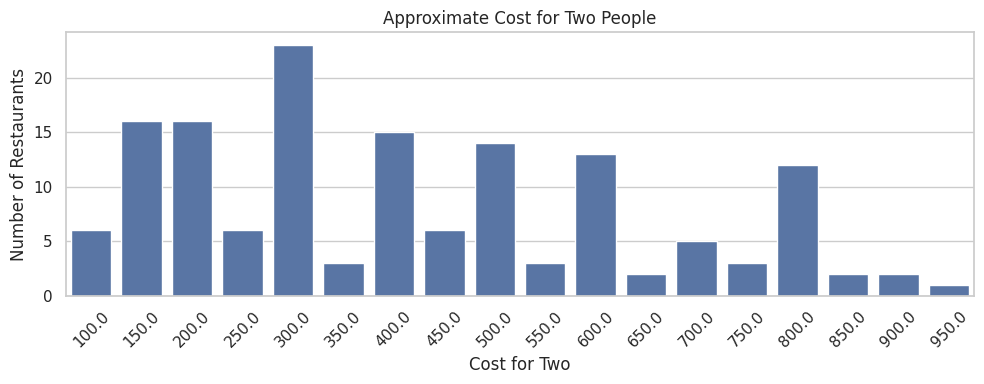

In [ ]:
plt.figure(figsize=(10, 4))
sns.countplot(
    x='approx_cost(for two people)',
    data=df_clean
)
plt.title("Approximate Cost for Two People")
plt.xlabel("Cost for Two")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Analysis 5: Online vs offline ratings**

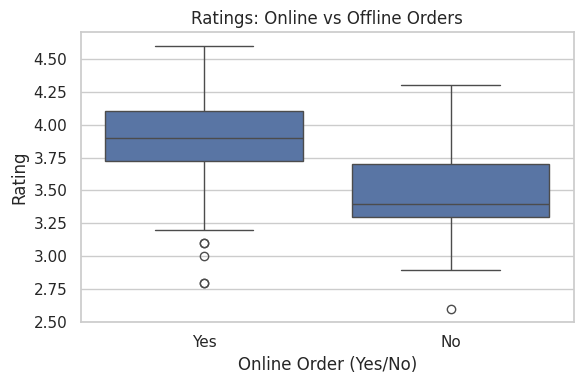

,rate
online_order,
No,3.487778
Yes,3.858621


In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='online_order', y='rate', data=df_clean)
plt.title("Ratings: Online vs Offline Orders")
plt.xlabel("Online Order (Yes/No)")
plt.ylabel("Rating")
plt.tight_layout()
plt.show()

# Average ratings for each mode
df_clean.groupby('online_order')['rate'].mean()


**Analysis 6: Online orders by restaurant type (heatmap)**

In [ ]:
pivot_online_type = pd.pivot_table(
    df_clean,
    index='listed_in(type)',
    columns='online_order',
    values='name',       # or another column like 'url' or 'restaurant_id'
    aggfunc='count',
    fill_value=0
)

pivot_online_type


online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


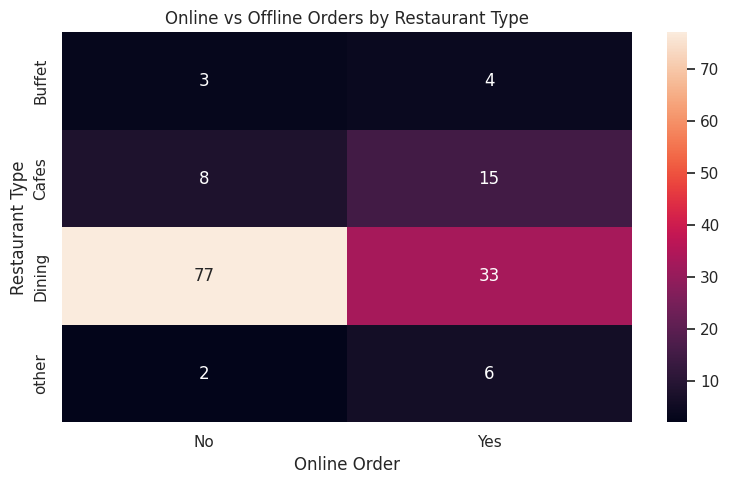

In [ ]:
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_online_type, annot=True, fmt='d')
plt.title("Online vs Offline Orders by Restaurant Type")
plt.xlabel("Online Order")
plt.ylabel("Restaurant Type")
plt.tight_layout()
plt.show()


**7. Find the Insights :**

1) What type of restaurant do the majority of customers order from?

In [ ]:
majority_type = (
    df_clean[df_clean['online_order'] == 'Yes']
    ['listed_in(type)']
    .value_counts()
)

print(majority_type)


listed_in(type)
Dining    33
Cafes     15
other      6
Buffet     4
Name: count, dtype: int64


2.) How many votes has each type of restaurant received from customers?

In [ ]:
votes_by_type = (
    df_clean
    .groupby('listed_in(type)')['votes']
    .sum()
    .sort_values(ascending=False)
)

votes_by_type


,votes
listed_in(type),
Dining,20363
other,9367
Cafes,6434
Buffet,3028


3.) What are the ratings that the majority of restaurants have received?

In [ ]:
df_clean['rating_range'].value_counts().sort_values(ascending=False)


,count
rating_range,
3.5–4.0,66
3.0–3.5,46
4.0–4.5,22
2.5–3.0,12
4.5–5.0,2
<2.5,0


4.) Zomato has observed that most couples order most of their food online. What is their average spending on each other?

In [ ]:
df_online = df_clean[df_clean['online_order'] == 'Yes']

avg_spend_couples = df_online['approx_cost(for two people)'].mean()
avg_spend_couples


np.float64(510.3448275862069)

5.) Which mode ( online or offline ) has received the maximum rating?

In [ ]:
mode_rating = df_clean.groupby('online_order')['rate'].mean()
mode_rating


,rate
online_order,
No,3.487778
Yes,3.858621


In [ ]:
df_clean.groupby('online_order')['rate'].max()


,rate
online_order,
No,4.3
Yes,4.6


6.) Which type received more offline orders, so that Zomato can provide those customers with some good offers?

In [ ]:
offline_type_counts = (
    df_clean[df_clean['online_order'] == 'No']
    ['listed_in(type)']
    .value_counts()
)

offline_type_counts


,count
listed_in(type),
Dining,77
Cafes,8
Buffet,3
other,2
